In [ ]:
from google.colab import files
import pandas as pd


In [ ]:
print("Please upload your drug inventory Excel file:")
uploaded = files.upload()

Please upload your drug inventory Excel file:


Saving drug_inventory_6000.xlsx to drug_inventory_6000 (1).xlsx


In [ ]:
filename = list(uploaded.keys())[0]


In [ ]:
import pandas as pd

# Load the dataset from the Excel file
file_path = "drug_inventory_6000.xlsx"
df = pd.read_excel(file_path)

def get_drug_quantity(drug_name):
    # Convert all drug names to lowercase for case-insensitive matching
    drug_name = drug_name.strip().lower()

    # Check if required columns exist
    if "Drug Name" in df.columns and "Quantity in Warehouse" in df.columns and "Drugs Sold" in df.columns:
        # Filter the dataset for the given drug
        drug_info = df[df["Drug Name"].str.lower() == drug_name]

        if not drug_info.empty:
            available_qty = drug_info["Quantity in Warehouse"].values[0]
            sold_qty = drug_info["Drugs Sold"].values[0]
            print(f"Drug: {drug_name.title()}")
            print(f"Available Quantity: {available_qty}")
            print(f"Sold Quantity: {sold_qty}")
        else:
            print("Drug not found in inventory.")
    else:
        print("Error: Column names do not match. Please check your dataset.")

# Get user input and display drug details
drug_name = input("Enter the drug name: ").strip()
get_drug_quantity(drug_name)


In [ ]:
try:
    df = pd.read_excel(filename)  # Read the Excel file
    df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces
    print("Columns in the dataset:", df.columns.tolist())  # Print column names for debugging
except Exception as e:
    print(f"Error loading Excel file: {e}")
    raise


Columns in the dataset: ['Drug ID', 'Drug Name', 'Contents', 'Expiry Date', 'Quantity in Warehouse', 'Warehouse ID', 'Drugs Sold']


In [ ]:
def get_drug_quantity(drug_name):
    try:
        if 'Drug Name' not in df.columns or 'Quantity in Warehouse' not in df.columns:
            print("Error: Column names 'Drug Name' or 'Quantity in Warehouse' not found. Please check your dataset.")
            return

        drug_data = df[df['Drug Name'].str.lower() == drug_name.lower()]
        if not drug_data.empty:
            total_quantity = drug_data['Quantity in Warehouse'].sum()  # Sum all matching quantities
            print(f"Total quantity of '{drug_name}': {total_quantity}")
        else:
            print(f"Drug '{drug_name}' not found in the warehouse.")
    except KeyError as e:
        print(f"KeyError: {e}. Please check the column names in the dataset.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
drug_name = input("Enter the drug name: ").strip()
get_drug_quantity(drug_name)


Enter the drug name: aspirin
Total quantity of 'aspirin': 392523


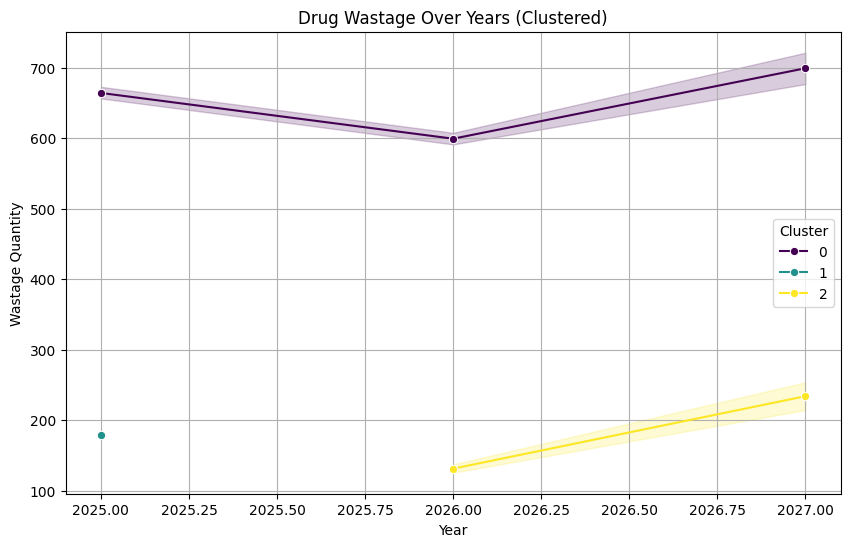

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
#file_path = "/mnt/data/drug_inventory_6000.xlsx"  # Adjust if needed
df = pd.read_excel(filename)

# Data Preprocessing
df.columns = df.columns.str.strip()  # Remove extra spaces
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'], errors='coerce')  # Convert date
df['Year'] = df['Expiry Date'].dt.year  # Extract year
df = df.dropna(subset=['Year'])  # Remove missing years

# Wastage Calculation
df['Wastage'] = df['Quantity in Warehouse'] - df['Drugs Sold']
df['Wastage'] = df['Wastage'].apply(lambda x: x if x > 0 else 0)  # Remove negative wastage

# K-Means Clustering (Grouping similar wastage patterns)
X = df[['Year', 'Wastage']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot Wastage Trends Over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Wastage', hue='Cluster', marker='o', palette='viridis')
plt.title("Drug Wastage Over Years (Clustered)")
plt.xlabel("Year")
plt.ylabel("Wastage Quantity")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()